In [1]:
import pickle

with open('tuning_3.4.pickle', 'rb') as f:
    data = pickle.load(f)

In [2]:
print(len(data['stim']))

24


In [3]:
print(data['neuron2'].size)

2400


In [4]:
import matplotlib.pyplot as plt
import numpy as np



In [5]:
response1 = np.array(data['neuron1'])
response2 = np.array(data['neuron2'])
response3 = np.array(data['neuron3'])
response4 = np.array(data['neuron4'])

print(response1)

[[19.7 27.4 28.1 ...  0.   9.8 16.1]
 [21.3 28.7 32.8 ...  0.   8.3 16.6]
 [21.5 27.3 29.3 ...  0.   8.6 17.2]
 ...
 [21.9 28.7 30.  ...  0.   8.7 14.4]
 [24.1 28.1 29.1 ...  0.   7.1 15.9]
 [24.  28.3 28.4 ...  0.   8.2 19.1]]


In [6]:
response1_spike_count = response1*10

var1 = np.var(response1_spike_count, axis=0)
mean1 = np.mean(response1_spike_count, axis=0)

print(var1/mean1)

[0.8482848  1.02610988 1.07357059 1.01720472 0.97909731 0.75616116
 0.93058217 0.83409803 0.78656216        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.83057471 1.15102167]


/var/folders/6b/41lqvs357tqbll6p284ymrj00000gn/T/ipykernel_33848/2948633306.py:6: RuntimeWarning: invalid value encountered in divide
  print(var1/mean1)


In [7]:
response2_spike_count = response2*10

var2 = np.var(response2_spike_count, axis=0)
mean2 = np.mean(response2_spike_count, axis=0)

print(var2/mean2)

[       nan        nan        nan        nan 1.01546763 1.07923614
 0.99616382 0.87518592 0.97279819 1.10690541 0.9109901  1.10637585
 1.00847379 1.05360833 1.26346679        nan        nan        nan
        nan        nan        nan        nan        nan        nan]


/var/folders/6b/41lqvs357tqbll6p284ymrj00000gn/T/ipykernel_33848/843241551.py:6: RuntimeWarning: invalid value encountered in divide
  print(var2/mean2)


In [8]:
response3_spike_count = response3*10

var3 = np.var(response3_spike_count, axis=0)
mean3 = np.mean(response3_spike_count, axis=0)

print(var3/mean3)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan 17.12204819  8.17197457  6.89972639
  3.78616249  3.18680412  2.64762233  1.9921363   2.8875408   2.86965644
  3.42075829  5.28181806  9.64490781 20.06429066  7.36222222         nan]


/var/folders/6b/41lqvs357tqbll6p284ymrj00000gn/T/ipykernel_33848/3657743362.py:6: RuntimeWarning: invalid value encountered in divide
  print(var3/mean3)


In [9]:
response4_spike_count = response4*10

var4 = np.var(response4_spike_count, axis=0)
mean4 = np.mean(response4_spike_count, axis=0)

print(var4/mean4)

[1.10333861 0.89154003 1.04409441        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 1.0943101  0.96834749
 0.83775912 0.95989131 0.90942085 1.10593293 0.73135531 1.09983662]


/var/folders/6b/41lqvs357tqbll6p284ymrj00000gn/T/ipykernel_33848/3237531406.py:6: RuntimeWarning: invalid value encountered in divide
  print(var4/mean4)


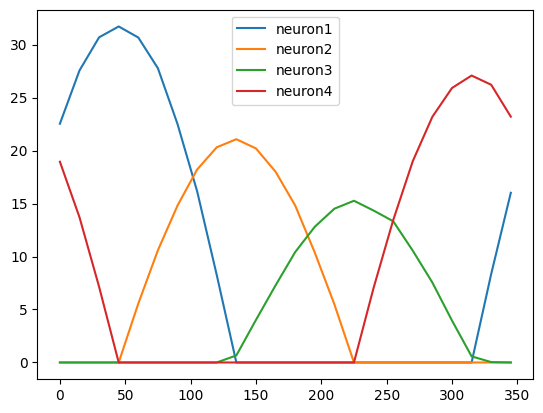

In [11]:
response1_avg = response1.mean(axis=0)
response2_avg = response2.mean(axis=0)
response3_avg = response3.mean(axis=0)
response4_avg = response4.mean(axis=0)

plt.plot(data['stim'], response1_avg, label="neuron1")
plt.plot(data['stim'], response2_avg, label="neuron2")
plt.plot(data['stim'], response3_avg, label="neuron3")
plt.plot(data['stim'], response4_avg, label="neuron4")
plt.legend()

In [13]:
import pickle

with open('pop_coding_3.4.pickle', 'rb') as f:
    data_pop = pickle.load(f)

In [16]:
max_average_firing_rate = np.array([response1_avg.max(),
                                    response2_avg.max(),
                                    response3_avg.max(),
                                    response4_avg.max()])


print(max_average_firing_rate)

[31.707 21.069 15.26  27.076]


In [19]:
# Calculate Population Matrix

r = np.array([np.mean(data_pop['r1']),
              np.mean(data_pop['r2']),
              np.mean(data_pop['r3']),
              np.mean(data_pop['r4'])
             ])

print(r)

[12.34 19.5   0.    0.  ]


[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


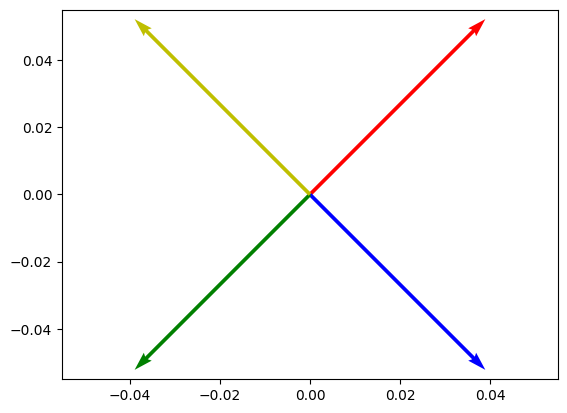

In [32]:
c = np.array([np.array(data_pop['c1']),
                 np.array(data_pop['c2']),
                 np.array(data_pop['c3']),
                 np.array(data_pop['c4'])
             ])

print(c)

origin = np.array([[0, 0, 0, 0],[0, 0, 0, 0]])

plt.quiver(*origin, c[:,0], c[:,1], color=['r','b','g','y'], scale=2)
plt.show()

In [43]:
r_over_rmax = r/max_average_firing_rate

# v_pop = c * r_over_rmax[:, None]
v_pop = np.dot(r_over_rmax, c)
print(v_pop)

# print(r_over_rmax)
# print(c)
# print(v_pop)

[ 0.92964665 -0.37925099]


In [50]:
from math import atan2, degrees

atan_value = v_pop[1]/v_pop[0]
print(str(round(degrees(atan2(v_pop[1], v_pop[0])))) + '°')

-22°
